In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
T = 2*np.pi

In [3]:
sample = np.array([14, 18.7, 9, 4.1, 6.7, 6, 6.3, 8.4, 4, 2.9])

In [4]:
k = len(sample)

In [6]:
Δx = T/k

In [8]:
Δx

0.6283185307179586

In [11]:
a0 = (Δx*sample).sum() / T

In [13]:
a0

8.01

In [14]:
m = 3

In [38]:
iΔx = np.arange(10)*Δx

In [39]:
iΔx

array([0.        , 0.62831853, 1.25663706, 1.88495559, 2.51327412,
       3.14159265, 3.76991118, 4.39822972, 5.02654825, 5.65486678])

In [26]:
np.sin(m*iΔx)

array([ 0.        ,  0.14112001, -0.2794155 ,  0.41211849, -0.53657292,
        0.65028784, -0.75098725,  0.83665564, -0.90557836,  0.95637593])

In [27]:
sample

array([14. , 18.7,  9. ,  4.1,  6.7,  6. ,  6.3,  8.4,  4. ,  2.9])

In [29]:
sample*np.sin(m*iΔx)*Δx

array([ 0.        ,  1.65809751, -1.58005742,  1.06166089, -2.25882934,
        2.4515274 , -2.97271298,  4.41576443, -2.27596666,  1.74263528])

In [30]:
a1 = np.array([1,2,3,4])

In [32]:
a2 = np.array([[0,1,2,3],[0,2,4,6],[0,3,6,9]])

In [35]:
a1*a2

array([[ 0,  2,  6, 12],
       [ 0,  4, 12, 24],
       [ 0,  6, 18, 36]])

In [36]:
(a1*a2).sum(axis=1)

array([20, 40, 60])

In [40]:
iΔx

array([0.        , 0.62831853, 1.25663706, 1.88495559, 2.51327412,
       3.14159265, 3.76991118, 4.39822972, 5.02654825, 5.65486678])

In [43]:
n = 5

In [50]:
(sample*np.sin(np.arange(1,n+1).reshape(n,1)*iΔx)*Δx).sum(axis=1)/np.pi

array([2.03757213e+00, 4.02253464e+00, 2.99913318e+00, 4.14134568e-02,
       7.66628896e-16])

In [51]:
def fourier(arr, n=5):
    m = len(arr)
    Δx = T/m
    a0 = (arr*Δx).sum()/T
    iΔx = np.arange(m)*Δx
    niΔx = np.arange(1,n+1).reshape(n,1)@iΔx.reshape(1,m)
    area_a = (arr*np.sin(niΔx)*Δx).sum(axis=1)
    aseq = area_a/np.pi
    # b_n
    area_b = (arr*np.cos(niΔx)*Δx).sum(axis=1)
    bseq = area_b/np.pi
    return a0, aseq, bseq 

In [52]:
def fser(a0, aseq, bseq, tarr):
    n = len(aseq)
    # 1t, 2t, ..., nt
    n_tarr = tarr * np.arange(1,n+1).reshape(n,1)
    sin_arr = np.sin(n_tarr)
    cos_arr = np.cos(n_tarr)
    f_sin = aseq@sin_arr
    f_cos = bseq@cos_arr
    f_values = a0 + f_sin + f_cos
    return f_values

In [53]:
sample

array([14. , 18.7,  9. ,  4.1,  6.7,  6. ,  6.3,  8.4,  4. ,  2.9])

In [54]:
t = np.linspace(0, 2*np.pi, 1000)

In [55]:
def my_fourier(n):
    a0, aseq, bseq = fourier(sample, n)
    fy = fser(a0, aseq, bseq, t)
    plt.plot(t, fy)

In [58]:
from ipywidgets import interact

In [59]:
interact(my_fourier, n=(1,20))

interactive(children=(IntSlider(value=10, description='n', max=20, min=1), Output()), _dom_classes=('widget-in…

<function __main__.my_fourier(n)>

In [60]:
rabbit = np.array([(-7.42457267835285, 1.06693233868844), (-5.00000000000000, 0.00000000000000), (-3.16072913905914, -0.117468644448697), (-1.26568756603972, -0.828109234330977), (0.550393941437221, -1.30186962758583), (2.44543551445664, -1.93355015192563), (4.73527741518845, -1.45978975867078), (6.15655859495301, -0.196428709991172), (7.34095957809015, -0.512268972161075), (9.15704108556709, 1.22485246977339), (10.2624820031617, 3.43573430496270), (11.6048031173838, 5.64661614015203), (11.4468829862989, 7.14685738545906), (10.1835219376193, 7.46269764762896), (9.47288134773700, 6.43621679557678), (8.76224075785471, 5.40973594352460), (7.97264010242995, 4.14637489484498), (6.94615925037777, 2.96197391170785), (6.23551866049549, 4.46221515701489), (5.76175826724063, 6.19933659894935), (5.28799787398578, 7.77853790979886), (4.73527741518845, 9.19981908956342), (5.36695793952825, 12.0423814490925), (5.00000000000000, 15.0000000000000), (3.86671669422120, 17.3327058404384), (2.20855531782921, 17.2537457748959), (0.787274138064648, 16.3851850539287), (0.629354006979697, 14.9639038741641), (0.313513744809792, 12.9899022356022), (0.234553679267317, 11.6475811213802), (0.00000000000000, 10.0000000000000), (-0.791927172784870, 8.88397882739352), (-1.58152782820963, 9.91045967944570), (-1.18672750049725, 12.8319821045173), (-0.949847303869821, 15.0428639397066), (-1.73944795929458, 16.7010253160986), (-3.08176907351667, 17.4906259715233), (-4.66097038436618, 17.6485461026083), (-5.68745123641838, 16.3062249883862), (-6.24017169521571, 14.3322233498243), (-6.31913176075819, 12.5951019078899), (-6.47705189184314, 10.6211002693280), (-6.87185221955552, 8.80501876185105), (-7.26665254726789, 7.22581745100154), (-7.50353274389532, 5.72557620569450), (-7.66145287498027, 4.14637489484498), (-7.58249280943780, 2.88301384616537)])

In [61]:
x = rabbit[:,0]
y = rabbit[:,1]

In [65]:
xa0, xaseq, xbseq = fourier(x, n=20)
ya0, yaseq, ybseq = fourier(y, n=20)

In [66]:
fx = fser(xa0, xaseq, xbseq, t)
fy = fser(ya0, yaseq, ybseq, t)

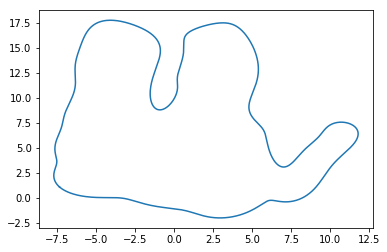

In [67]:
plt.plot(fx,fy)